# Kickstarter Project Success Evaluation- A Classification Model Example

This model aims at predicting the possible outcome (i.e., success or failure) of a Kickstarter project based on several factors. This model can be provice some guidance for future project starters.

## Section A: Data Preprocessing

### Step 1: Import relevant libraries:

In [1]:
# Standard libraries for data preprocessing
import random, os, timeit
import warnings, re
# warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
# Standard Libraries for data processing and plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Data preprocessing modules
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

In [4]:
# Modules for Model Selection from sklearn
from sklearn import model_selection
## Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [5]:
# Modules for Model Evaluation & Improvement from sklearn   
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import fbeta_score, make_scorer, log_loss, f1_score
from sklearn.metrics import auc, roc_auc_score, roc_curve, average_precision_score
from sklearn.metrics import classification_report, precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import cross_val_score, learning_curve, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import KFold
from sklearn import feature_selection

In [6]:
#Standard libraries for data visualization:
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
import scikitplot as skplt
#pd.options.display.max_columns = None
#sns.set_style('darkgrid')

### Step 2: Set up/check the current working directory:

In [7]:
# Print the current working directory
print(os.listdir())

['.DS_Store', 'ks-projects-201801.csv', '.gitignore', 'Kickstarter_Success_Evaluation.ipynb', '.ipynb_checkpoints', '.git']


### Step 3: Import/Read the dataset:

The Kickstarters Projects dataset was downloaded from the following link: https://www.kaggle.com/kemical/kickstarter-projects

In [8]:
### Read the dataset and review
dataset = pd.read_csv('ks-projects-201801.csv')
dataset=dataset.iloc[0:100000,:]

# Check columns names
dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

### Step 4: Evaluate data structure: 

In [9]:
dataset.head()   # Read the first five rows of the dataset

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usdpledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [10]:
# Check the columns of the dataset
dataset.columns  

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usdpledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

Majority of the columns are self-explanotary. The following column name descriptions were taken from: https://www.kaggle.com/kemical/kickstarter-projects
- usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).
- usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).
- usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).

In [11]:
# Look at the summary of numerical columns
dataset.describe()

,ID,goal,pledged,backers,usdpledged,usd_pledged_real,usd_goal_real
count,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,9.901200e+04,1.000000e+05,1.000000e+05
mean,1.140420e+09,4.623868e+04,9.525802e+03,104.818180,6.960274e+03,8.956553e+03,4.215603e+04
std,3.693210e+08,1.150164e+06,8.259227e+04,903.003728,6.579509e+04,7.891381e+04,1.135526e+06
min,1.061440e+05,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.900000e-01
25%,1.084617e+09,2.000000e+03,3.100000e+01,2.000000,1.820000e+01,3.100000e+01,2.000000e+03
50%,1.225813e+09,5.093500e+03,6.250000e+02,12.000000,3.990000e+02,6.250000e+02,5.479940e+03
75%,1.367657e+09,1.600000e+04,4.106000e+03,56.000000,3.047790e+03,4.074025e+03,1.543679e+04
max,1.507855e+09,1.000000e+08,8.596475e+06,154926.000000,8.596475e+06,8.596475e+06,1.663614e+08


In [12]:
# Check missing data - It looks like there are some missing data in the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                100000 non-null  int64  
 1   name              100000 non-null  object 
 2   category          100000 non-null  object 
 3   main_category     100000 non-null  object 
 4   currency          100000 non-null  object 
 5   deadline          100000 non-null  object 
 6   goal              100000 non-null  float64
 7   launched          100000 non-null  object 
 8   pledged           100000 non-null  float64
 9   state             100000 non-null  object 
 10  backers           100000 non-null  int64  
 11  country           100000 non-null  object 
 12  usdpledged        99012 non-null   float64
 13  usd_pledged_real  100000 non-null  float64
 14  usd_goal_real     100000 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 11.4+ MB


In [13]:
dataset.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usdpledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [14]:
# Check the number of rows and columns of the dataset
print('Number of rows = %2.0i' %dataset.shape[0])
print('Number of columns = %2.0i' %dataset.shape[1])

Number of rows = 100000
Number of columns = 15


### Step 5: Remove unnecessary columns

Remove the columns that are not needed or not useful for the analysis. The 'currency' column will not be used. The goal and pledged amount of the projects were converted to usd and named as 'usd_pledged_real' and 'usd_goal_real'. Therefore, these columns will be used in the data exploration. 'goal', 'pledged' and 'usdpledged' columns will be removed. 

In [15]:
cols_to_remove = ['currency', 'goal','pledged','usdpledged']
data_rmv = dataset[cols_to_remove]
dataset.drop(columns=cols_to_remove,inplace=True)
print('The following columns were removed from the dataset', cols_to_remove)

The following columns were removed from the dataset ['currency', 'goal', 'pledged', 'usdpledged']


### Step 6: Perform necessary file conversion and column/feature organization

In [16]:
# Compute the duration of each project campaign and save it as a new column ('duration')
dataset['launched'] = pd.to_datetime(dataset['launched'])
dataset['deadline'] = pd.to_datetime(dataset['deadline'])
dataset['duration'] = (dataset['deadline'] - dataset['launched']).astype('timedelta64[D]')


# Launch and deadline day of week
dataset['launchday'] = dataset['launched'].dt.day_name()
dataset['deadlineday'] = dataset['deadline'].dt.day_name()

# Launch and deadline of month
dataset['launchmonth'] = dataset['launched'].dt.month_name()
dataset['deadlinemonth'] = dataset['deadline'].dt.month_name()

# Launch hour
dataset['launchhour'] =dataset['launched'].dt.hour 
dataset['launchyear'] =dataset['launched'].dt.year.astype(str)

def calculate_launchtime(ds):
    '''Creates two hour bins from the launch_hour column'''
    if ds['launchhour'] in [0,1,2]:
        return '0-2'
    elif ds['launchhour'] in [3,4,5]:
        return '3-5'
    elif ds['launchhour'] in [6,7,8]:
        return '6-8'
    elif ds['launchhour'] in [9,10,11]:
        return '9-11'
    elif ds['launchhour'] in [12,13,14]:
        return '12-14'
    elif ds['launchhour'] in [15,16,17]:
        return '15-17'
    elif ds['launchhour'] in [18,19,20]:
        return '18-20'
    elif ds['launchhour'] in [21,22,23]:
        return '21-23'
    
dataset['launchtime'] = dataset.apply(calculate_launchtime, axis=1) 
dataset.drop('launchhour', axis=1, inplace=True)

# Remove 'launced' and 'deadline' columns
col_rem = ['launched','deadline']
dataset.drop(columns=col_rem,inplace=True)
print('The following columns were removed from the dataset', col_rem)


The following columns were removed from the dataset ['launched', 'deadline']


In [17]:
# Computed pledged ratio - Representing the ratio of pledged money relative to the goal.
dataset['pledge_rate'] = dataset['usd_pledged_real']/dataset['usd_goal_real']

In [18]:
print(f'Number of columns: {dataset.shape[1]}, Number of rows:{dataset.shape[0]} - Before removing duplicates')
# Drop duplicates
dataset.drop_duplicates(subset='ID', keep='first', inplace=True)
print(f'Number of columns: {dataset.shape[1]}, Number of rows:{dataset.shape[0]} - After removing duplicates')

Number of columns: 17, Number of rows:100000 - Before removing duplicates
Number of columns: 17, Number of rows:100000 - After removing duplicates


In [19]:
# Replace name with the length of the name of the project
dataset['name'] = dataset['name'].str.split().str.len()

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                100000 non-null  int64  
 1   name              100000 non-null  int64  
 2   category          100000 non-null  object 
 3   main_category     100000 non-null  object 
 4   state             100000 non-null  object 
 5   backers           100000 non-null  int64  
 6   country           100000 non-null  object 
 7   usd_pledged_real  100000 non-null  float64
 8   usd_goal_real     100000 non-null  float64
 9   duration          100000 non-null  float64
 10  launchday         100000 non-null  object 
 11  deadlineday       100000 non-null  object 
 12  launchmonth       100000 non-null  object 
 13  deadlinemonth     100000 non-null  object 
 14  launchyear        100000 non-null  object 
 15  launchtime        100000 non-null  object 
 16  pledge_rate       100

In [21]:
# Check the dataset again
dataset.head()

,ID,name,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real,duration,launchday,deadlineday,launchmonth,deadlinemonth,launchyear,launchtime,pledge_rate
0,1000002330,6,Poetry,Publishing,failed,0,GB,0.0,1533.95,58.0,Tuesday,Friday,August,October,2015,12-14,0.000000
1,1000003930,8,Narrative Film,Film & Video,failed,15,US,2421.0,30000.00,59.0,Saturday,Wednesday,September,November,2017,3-5,0.080700
2,1000004038,3,Narrative Film,Film & Video,failed,3,US,220.0,45000.00,44.0,Saturday,Tuesday,January,February,2013,0-2,0.004889
3,1000007540,7,Music,Music,failed,1,US,1.0,5000.00,29.0,Saturday,Monday,March,April,2012,3-5,0.000200
4,1000011046,8,Film & Video,Film & Video,canceled,14,US,1283.0,19500.00,55.0,Saturday,Saturday,July,August,2015,6-8,0.065795


### Step 7: Identify columns: Numerical and Categorical

In [22]:
# Specify ID column
cols_id = ['ID']
cols_cat=[]

# Identify categorical columns
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        cols_cat.append(col)
print('{} columns are categorical.'.format(len(cols_cat)))
print('List of columns categorical: ',  cols_cat)

# Define/update categorical columns
cols_cat=cols_cat

10 columns are categorical.
List of columns categorical:  ['category', 'main_category', 'state', 'country', 'launchday', 'deadlineday', 'launchmonth', 'deadlinemonth', 'launchyear', 'launchtime']


In [23]:
# Identify numerical columns
cols_num=[]
for col in dataset.columns:
    if dataset[col].dtype != 'object':
        cols_num.append(col)
print('{} columns were numeric.'.format(len(cols_num)))
print('List of columns numeric: ',  cols_num)

# Define/update numerical columns
cols_num=cols_num

7 columns were numeric.
List of columns numeric:  ['ID', 'name', 'backers', 'usd_pledged_real', 'usd_goal_real', 'duration', 'pledge_rate']


In [24]:
# Determine categorical columns with unique values <= 2
col_bincat =[]
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            col_bincat.append(col)

print('{} categorical columns were unique values of 2 or less'.format(len(col_bincat)))
print('List of columns : ',  col_bincat)

0 categorical columns were unique values of 2 or less
List of columns :  []


In [25]:
# Determine categorical columns with unique values > 2
col_mulcat =[]
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) > 2:
            col_mulcat.append(col)
            print('Number of unique variables in column {:3} = {:3}'.format(col, dataset[col].nunique()))

print('{} categorical columns were unique values more than 2'.format(len(col_mulcat)))
print('List of columns: ',  col_mulcat)

Number of unique variables in column category = 159
Number of unique variables in column main_category =  15
Number of unique variables in column state =   6
Number of unique variables in column country =  23
Number of unique variables in column launchday =   7
Number of unique variables in column deadlineday =   7
Number of unique variables in column launchmonth =  12
Number of unique variables in column deadlinemonth =  12
Number of unique variables in column launchyear =  11
Number of unique variables in column launchtime =   8
10 categorical columns were unique values more than 2
List of columns:  ['category', 'main_category', 'state', 'country', 'launchday', 'deadlineday', 'launchmonth', 'deadlinemonth', 'launchyear', 'launchtime']


### Step 8: Check the variation of the target variable. It is important to check any imbalance issues. 

In [26]:
target_col = 'state'

# Checking target variable - Whether tha data is balanced or unbalanced
dataset['state'].value_counts()

failed        52072
successful    35638
canceled      10149
undefined       927
live            733
suspended       481
Name: state, dtype: int64

In [27]:
# Dropping projects that are not succesfull or failed
dataset = dataset[dataset['state'].isin(['successful', 'failed'])]

# Assuming projects with state successful as "1" and rest of them as "0"
dataset['state'] = dataset['state'].map(lambda x: 1 if x== 'successful' else 0)

In [28]:
dataset["state"].value_counts()

0    52072
1    35638
Name: state, dtype: int64

### Step 9: Handle missing/duplicate data: 
If there is missing data, use an appropriate approach to fill missing values.

In [29]:
dataset.isna().sum()

ID                  0
name                0
category            0
main_category       0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
duration            0
launchday           0
deadlineday         0
launchmonth         0
deadlinemonth       0
launchyear          0
launchtime          0
pledge_rate         0
dtype: int64

There are three projects without a name. These will be removed.

In [30]:
print(f'Number of columns: {dataset.shape[1]}, Number of rows:{dataset.shape[0]} - Before dropping values')
# Drop missing values
dataset.dropna(inplace=True)
print(f'Number of columns: {dataset.shape[1]}, Number of rows:{dataset.shape[0]} - After dropping values')

Number of columns: 17, Number of rows:87710 - Before dropping values
Number of columns: 17, Number of rows:87710 - After dropping values


In [31]:
# Reset index
dataset = dataset.reset_index(drop=True)

# Section B: Data Evaluation
## Step 10: Exploratory Data Analysis: 
Visualize numeric and categorical variables to characterize patterns in the dataset 

### Step 10.1: Analyze distribution of target variable

<ipython-input-32-7a39b8a0146f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_rate["target_label"] = np.where((target_rate[ref_col] == 0), "Failed", "Successful")


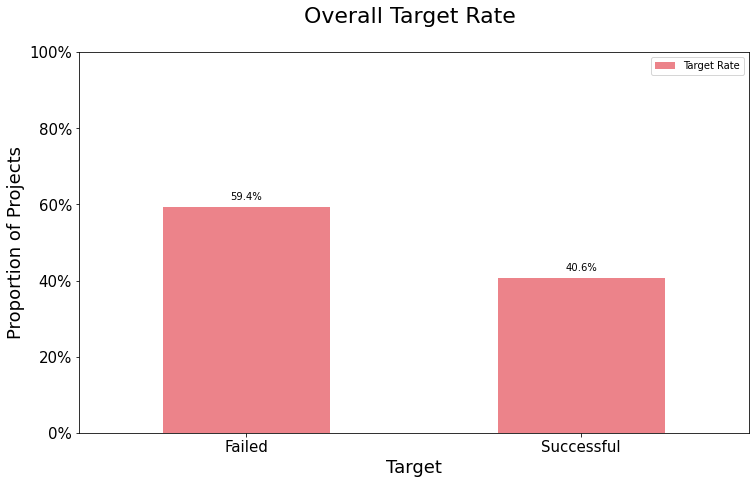

In [32]:
id_col='ID' # Select the identification column
ref_col='state'    # Select the target column

# Compute target ratio
target_rate = dataset[[ref_col, id_col]]
target_rate["target_label"] = np.where((target_rate[ref_col] == 0), "Failed", "Successful")
target_ratio = target_rate.groupby ("target_label")
target_rate = pd.DataFrame(target_ratio[id_col].count())
target_rate ["Target Rate"] = (target_rate [id_col]/ sum(target_rate [id_col]) )*100

# Plotting
ax =  target_rate[["Target Rate"]].plot.bar(title = 'Overall Target Rate',
                                          legend =True, table = False,grid = False,  
                                          subplots = False, figsize =(12, 7), color = '#ec838a', 
                                          fontsize = 15, stacked=False, ylim =(0,100))
plt.ylabel('Proportion of Projects',horizontalalignment="center",fontstyle = "normal", 
           fontsize = "18", fontfamily = "sans-serif")
plt.xlabel('Target',horizontalalignment="center",fontstyle = "normal", 
           fontsize = "18", fontfamily = "sans-serif")
plt.title('Overall Target Rate \n',horizontalalignment="center", fontstyle = "normal", 
          fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
        ax.annotate(label, (x_value, y_value),xytext=(0, space), textcoords="offset points", ha='center',va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

###  Step 10.2: Analyze distribution of categorical variables

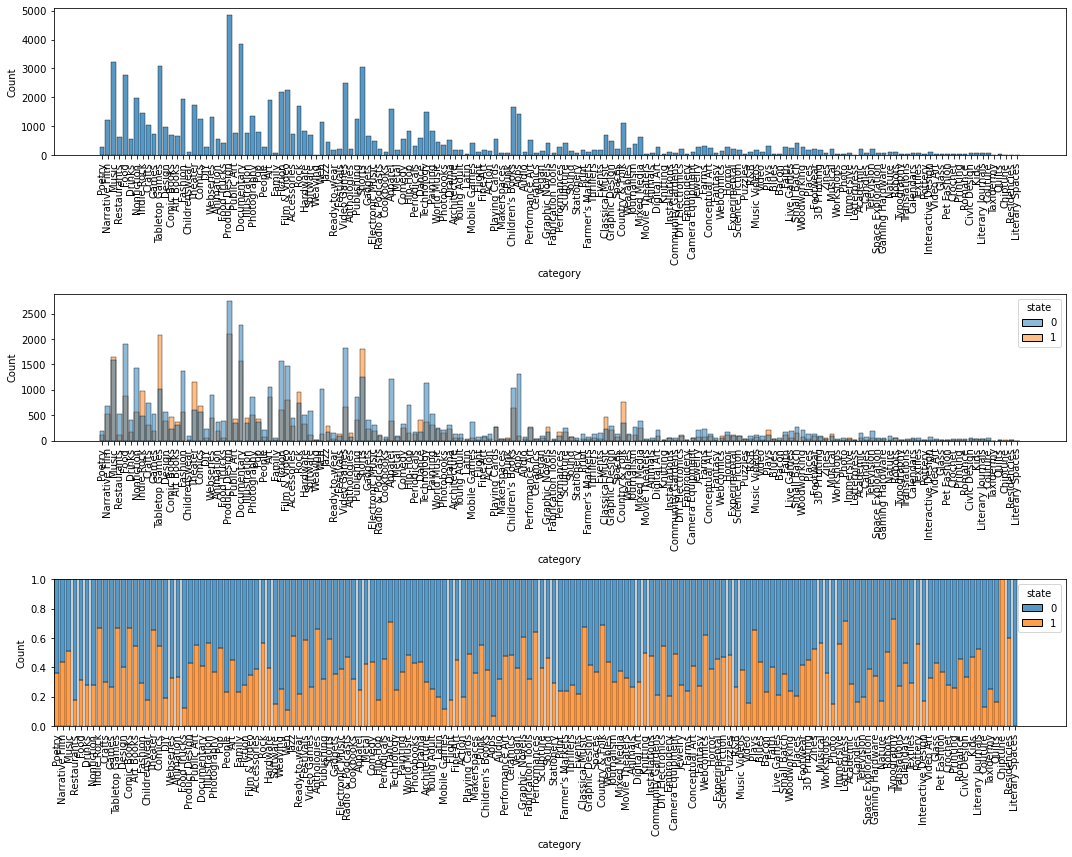

In [33]:
def plot_categorical(ds,cat_cols,ref_col,rowcol):
    fig, ax = plt.subplots(nrows = rowcol[0],ncols = rowcol[1],figsize = (15,12))
    i=1
    for col in cols_vars:
        binnum = min(20,len(list(ds[col].unique())))
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col,shrink=0.8, bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, multiple='fill', bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        
cols_vars= ['category']
ref_col='state'
rowcolumn = [3,1]
plot_categorical(dataset,cols_vars,ref_col,rowcolumn)
plt.tight_layout()

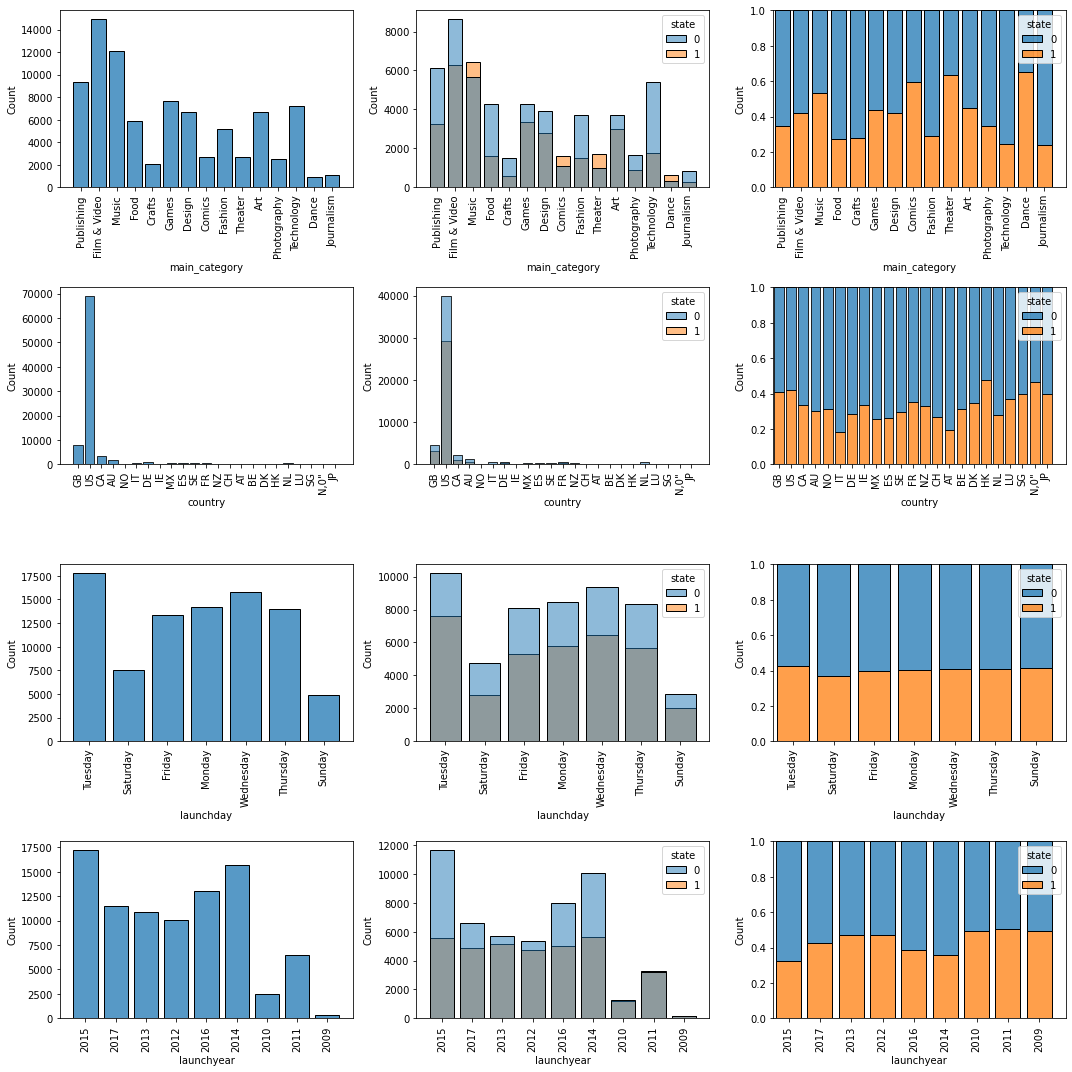

In [34]:
def plot_categorical(ds,cat_cols,ref_col,rowcol):
    fig, ax = plt.subplots(nrows = rowcol[0],ncols = rowcol[1],figsize = (15,15))
    i=1
    for col in cols_vars:
        binnum = min(20,len(list(ds[col].unique())))
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col,shrink=0.8, bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, multiple='fill', bins=binnum)
        plt.xticks(rotation=90,fontsize = "10")
        i=i+1
        
cols_vars= ['main_category','country', 'launchday','launchyear']
ref_col='state'
rowcolumn = [4,3]
plot_categorical(dataset,cols_vars,ref_col,rowcolumn)
plt.tight_layout()

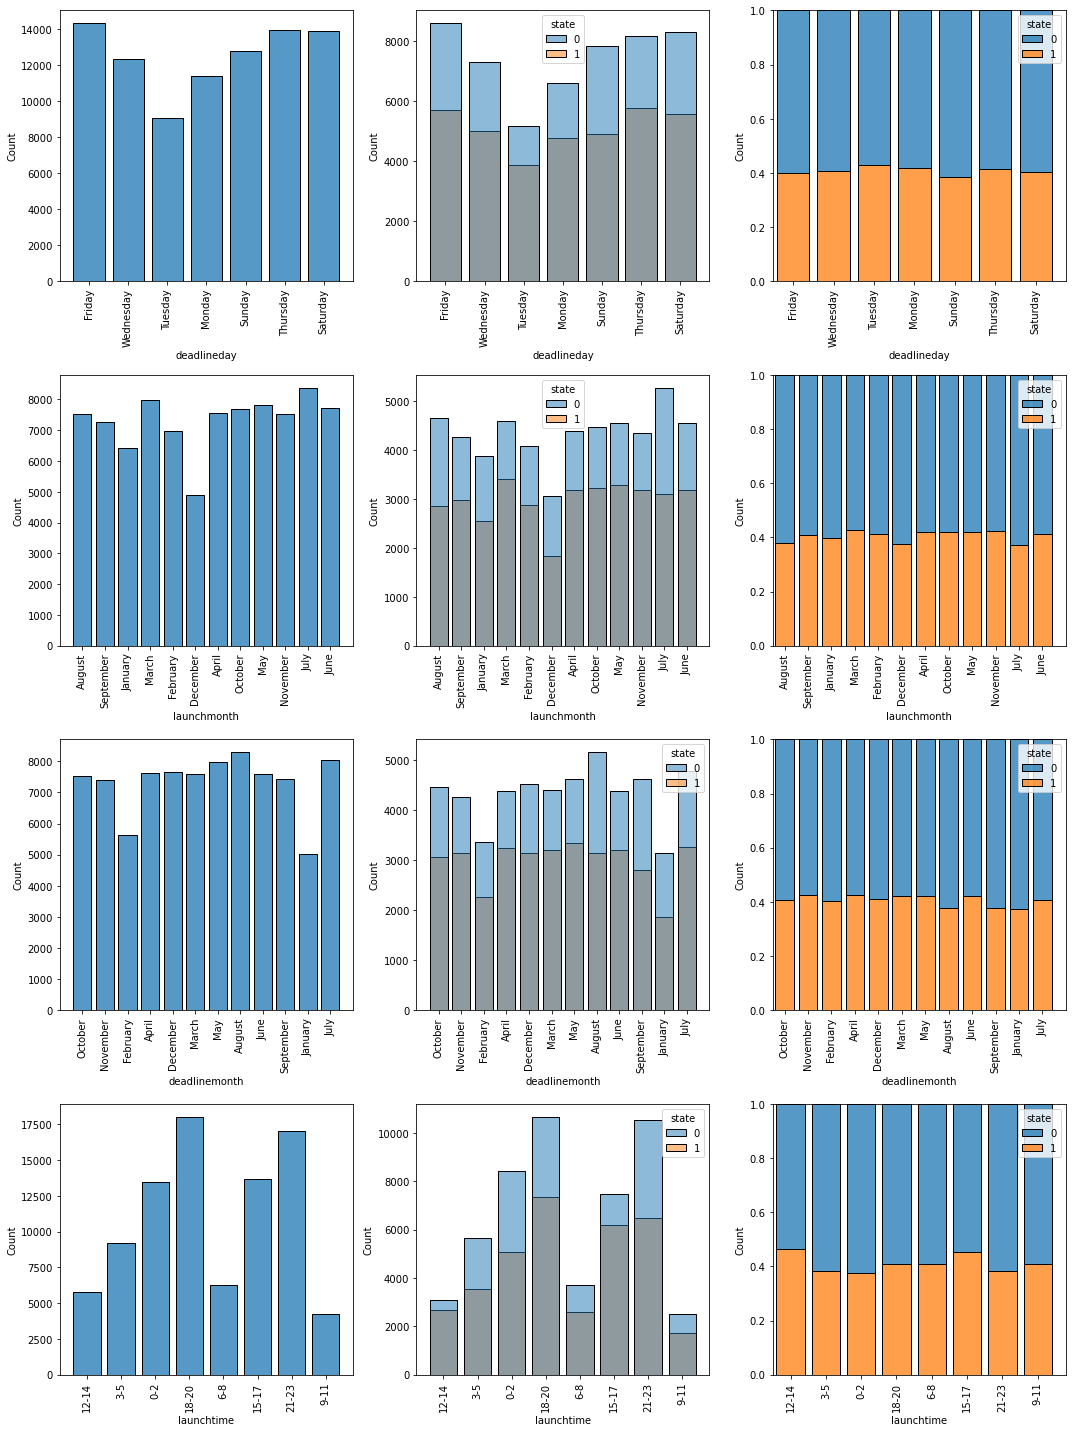

In [35]:
def plot_categorical(ds,cat_cols,ref_col,rowcol):
    fig, ax = plt.subplots(nrows = rowcol[0],ncols = rowcol[1],figsize = (15,20))
    i=1
    for col in cols_vars:
        binnum = min(20,len(list(ds[col].unique())))
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col,shrink=0.8, bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, multiple='fill', bins=binnum)
        plt.xticks(rotation=90,fontsize = "10")
        i=i+1
        
cols_vars= ['deadlineday', 'launchmonth', 'deadlinemonth', 'launchtime']
ref_col='state'
rowcolumn = [4,3]
plot_categorical(dataset,cols_vars,ref_col,rowcolumn)
plt.tight_layout()

###  Step 10.3: Analyze distribution of numerical variables

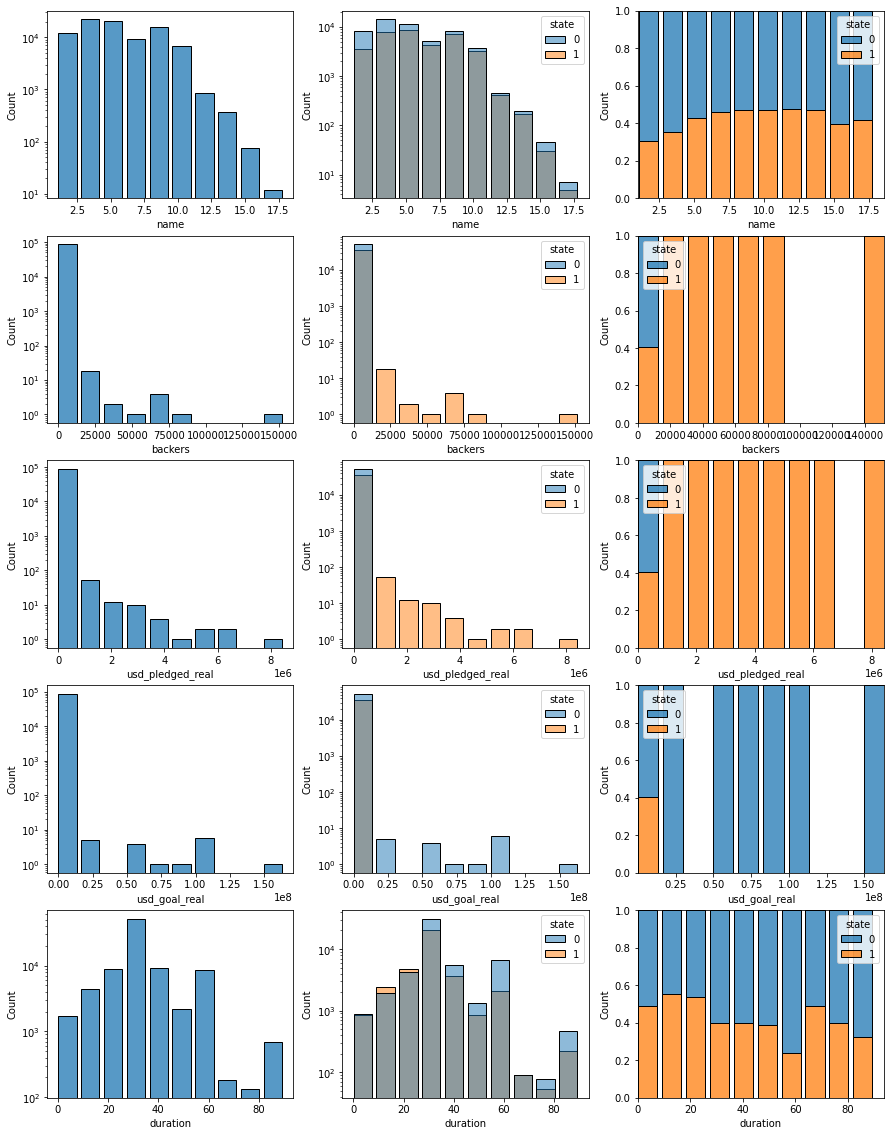

In [36]:
def plot_numerical(ds,cat_cols,ref_col,rowcol):
    fig, ax = plt.subplots(nrows = rowcol[0],ncols = rowcol[1],figsize = (15,20))
    i=1
    for col in cols_vars:
        binnum = min(10,len(list(ds[col].unique())))
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col,shrink=0.8, bins=binnum)
        plt.yscale('log')
        i=i+1        
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, bins=binnum)
        plt.yscale('log')
        i=i+1
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, multiple='fill', bins=binnum)
        i=i+1

cols_vars= ['name','backers', 'usd_pledged_real', 'usd_goal_real', 'duration']
ref_col='state'
rowcolumn = [len(cols_vars),3]
plot_numerical(dataset,cols_vars,ref_col,rowcolumn)

###  Step 10.4: Transform columns if needed

In [37]:
# Transform columns that are widely spread
logcols = ['backers','usd_goal_real']
for col in logcols:
    dataset[col] = dataset[col].astype('float64').replace(0.0, 0.01)
    dataset[col] = np.log(dataset[col])

###  Step 10.5: Reanalyze distribution of numerical variables after filtering/conversion/transformation

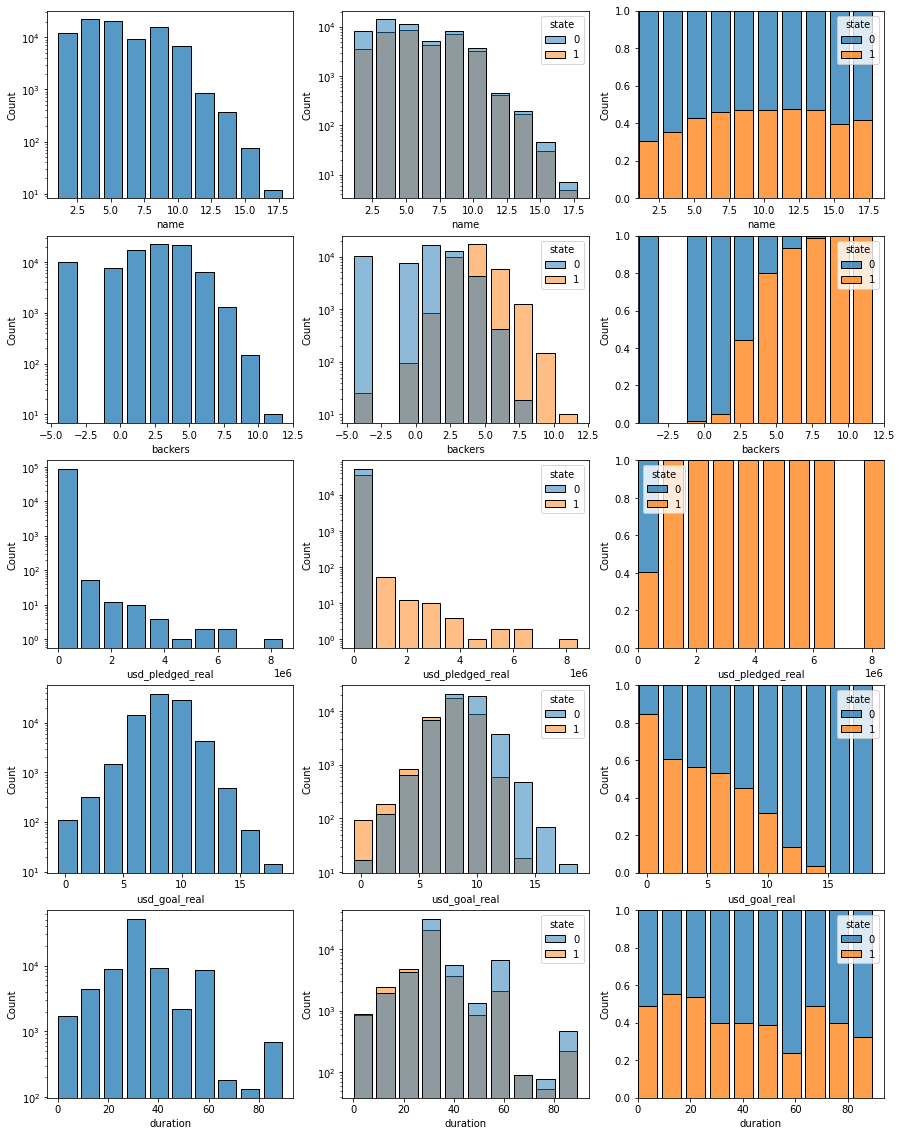

In [38]:
def plot_numerical(ds,cat_cols,ref_col,rowcol):
    fig, ax = plt.subplots(nrows = rowcol[0],ncols = rowcol[1],figsize = (15,20))
    i=1
    for col in cols_vars:
        binnum = min(10,len(list(ds[col].unique())))
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col,shrink=0.8, bins=binnum)
        plt.yscale('log')
        i=i+1        
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, bins=binnum)
        plt.yscale('log')
        i=i+1
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, multiple='fill', bins=binnum)
        i=i+1

cols_vars= ['name','backers', 'usd_pledged_real', 'usd_goal_real', 'duration']
ref_col='state'
rowcolumn = [len(cols_vars),3]
plot_numerical(dataset,cols_vars,ref_col,rowcolumn)

## Step 11: Check features before using them in models

###  Step 11.1: Remove unnecessary columns

In [39]:
#Applying changes in the main dataset: - Remove columns with high colunearity or unnecessary columns
col_to_drop = ['backers','usd_pledged_real','pledge_rate','launchyear']
dataset = dataset.drop(columns = col_to_drop)
print("The following columns were removed",col_to_drop)

The following columns were removed ['backers', 'usd_pledged_real', 'pledge_rate', 'launchyear']


###  Step 11.2: Correlation between variables

In [40]:
# Check correlations:

# Select the columns for correlation calculation
dataset2 = dataset[[ 'name','usd_goal_real', 'duration']]

correlations = dataset2.corrwith(dataset['state'])
correlations = correlations[correlations!=1]

positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

print('\nMost Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)


Most Positive Correlations: 
 name    0.115763
dtype: float64

Most Negative Correlations: 
 duration        -0.119444
usd_goal_real   -0.222864
dtype: float64


### Step 11.3: Plot variable correlations:

Text(0.5, 1.0, 'Correlation with Target \n')

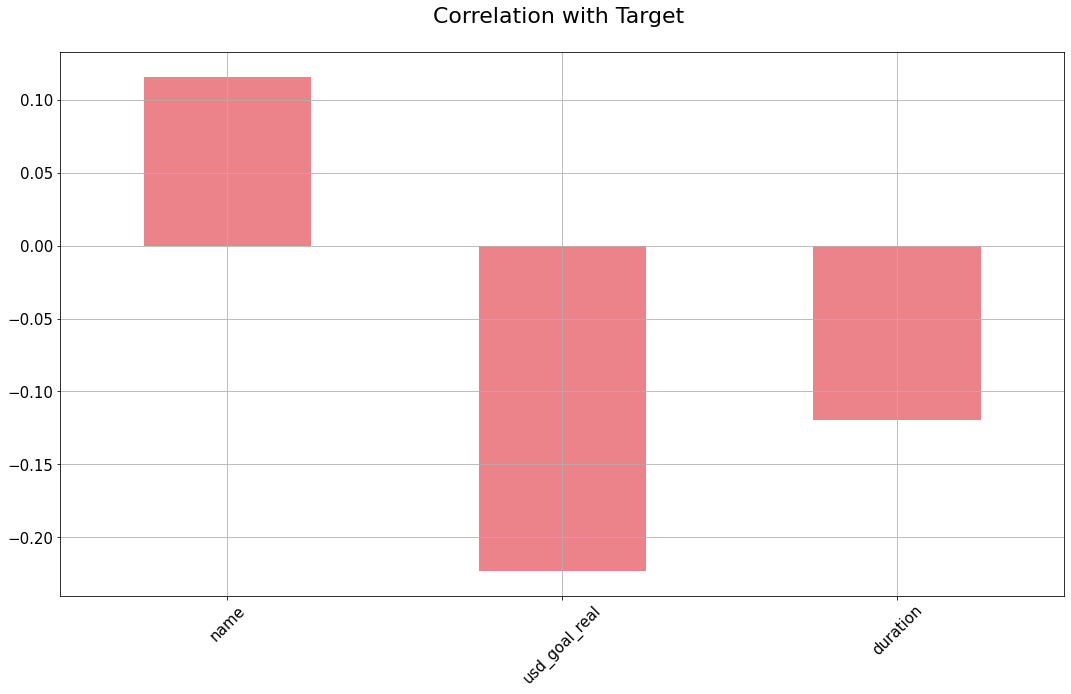

In [41]:
correlations = dataset2.corrwith(dataset['state'])

correlations = correlations[correlations!=1]
correlations.plot.bar(figsize = (18, 10), fontsize = 15, 
                      color = '#ec838a',rot = 45, grid = True)

plt.title('Correlation with Target \n',horizontalalignment="center", fontstyle = "normal", 
          fontsize = "22", fontfamily = "sans-serif")

### Step 11.4: Plot Correlation Matrix of all independent variables: 

<AxesSubplot:>

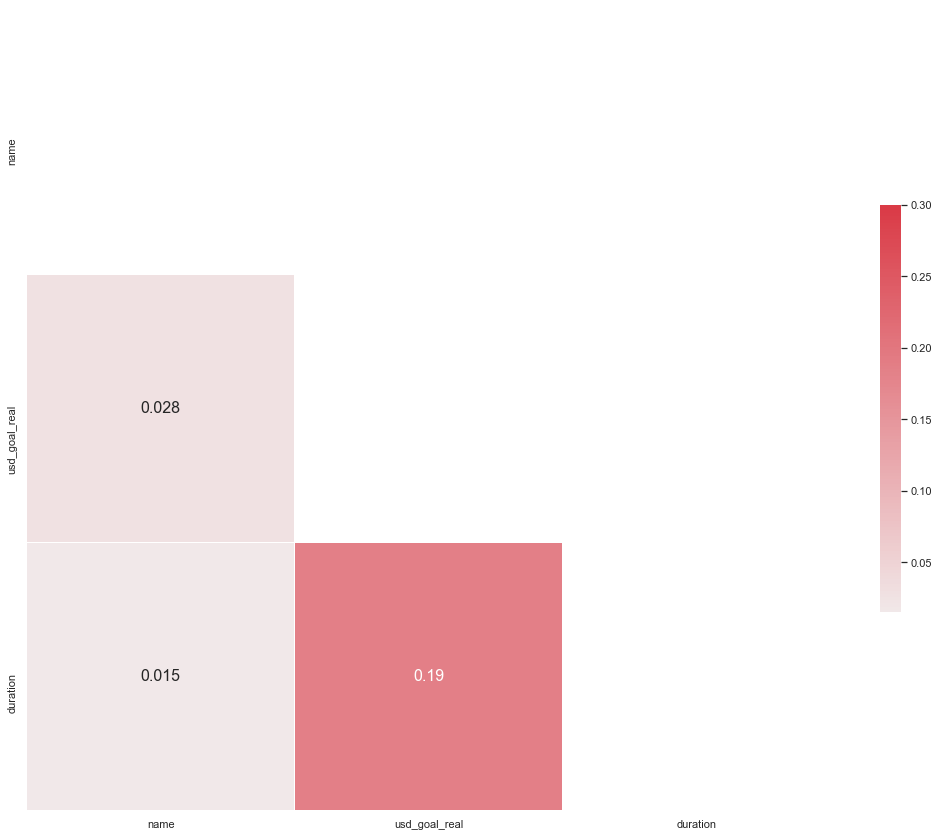

In [42]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = dataset2.corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, annot_kws = {'fontsize': 16})

### Step 11.5: Compute p-value and chi-square of the columns
p-values are relatively low.

In [43]:
# Compute p-value and chi-square of the columns
corr_col_list = ['main_category','country', 'usd_goal_real']

chi2_array, p_array = [], []
for column in corr_col_list :
    crosstab = pd.crosstab(dataset[column], dataset['state'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({'Variable': corr_col_list , 
                       'Chi-square': chi2_array, 
                       'p-value': p_array})
df_chi.sort_values(by = 'p-value', ascending = False)

,Variable,Chi-square,p-value
2,usd_goal_real,20417.837464,2.462698e-64
1,country,636.034579,2.319639e-120
0,main_category,4072.375691,0.000000e+00


### Step 12: Check Multicollinearity using VIF: 
Multicollinearity check using Variable Inflation Factors (VIF). Unlike Correlation matrix, VIF determines the strength of the correlation of a variable with a group of other independent variables in a dataset. VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

In [44]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

dataset2 = dataset[['name','duration','usd_goal_real']]

calc_vif(dataset2)

,variables,VIF
0,name,4.635176
1,duration,7.314231
2,usd_goal_real,9.852924


### Step 13: Label Encode Binary data: 
Use Label Encoding for any categorical variable with two or less unique values.

In [45]:
#Create a label encoder object
le = LabelEncoder()
col_list=[]
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            col_list.append(col)
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))
print('List of columns label encoded: ',  col_list)

0 columns were label encoded.
List of columns label encoded:  []


### Step 14: Encode Categorical data: 
For categorical variable with more than two unique values, use get_dummies method.

In [46]:
#Incase if user_id is an object:
identity = dataset["ID"]
dataset = dataset.drop(columns=['ID'])

#Convert rest of categorical variable into dummy:
dataset= pd.get_dummies(dataset)

In [47]:
print(f'Number of columns: {dataset.shape[1]}, Number of rows:{dataset.shape[0]}')
dataset.head()

Number of columns: 247, Number of rows:87710


,name,state,usd_goal_real,duration,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,...,deadlinemonth_October,deadlinemonth_September,launchtime_0-2,launchtime_12-14,launchtime_15-17,launchtime_18-20,launchtime_21-23,launchtime_3-5,launchtime_6-8,launchtime_9-11
0,6,0,7.335601,58.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,8,0,10.308953,59.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,0,10.714418,44.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,7,0,8.517193,29.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,1,10.819778,34.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Step 15: Split the dataset into dependent and independent variables: 
Now we need to separate the dataset into X and y values.

In [48]:
# Reset index
dataset = dataset.reset_index(drop=True)
#Identify response variable:
response = dataset["state"]
dataset = dataset.drop(columns="state")

### Step 16: Conduct Feature Scaling: 
Apply feature scaling for numerical variables.

In [49]:
scl_cols = ['usd_goal_real','name','duration']
sc_X = StandardScaler()
dataset[scl_cols] = pd.DataFrame(sc_X.fit_transform(dataset[scl_cols]))
print('The following columns were scaled',scl_cols)

The following columns were scaled ['usd_goal_real', 'name', 'duration']


### Step 17: Split dataset into training and test sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset, response, test_size = 0.2, random_state = 42)

#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (70168, 246)
Number transactions y_train dataset:  (70168,)
Number transactions X_test dataset:  (17542, 246)
Number transactions y_test dataset:  (17542,)


## Section C: Model Selection

### Step 18: Compare Baseline Classification Algorithms: 
Apply multiple classification models on the training dataset and evaluate their accuracy.

In [51]:
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

In [52]:
models = []
models.append(('Logistic Regression, LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
#models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
#models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
#models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
#models.append(('Gaussian NB', GaussianNB()))
#models.append(('Decision Tree Classifier,DT',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest,RF', RandomForestClassifier()))
#models.append(('Gradient Boosting Classifier, GBC', GradientBoostingClassifier(random_state = 0)))
models.append(('XGB Classifier, XGB',XGBClassifier(random_state = 0,use_label_encoder=False,eval_metric='mlogloss')))
models.append(('LGBM Classifier, LGBMC',LGBMClassifier(random_state = 0)))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'Accuracy Mean', 'Recall Mean','f1_score Mean']

# Create a DataFrame of performance results
model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation:
for name, model in models:
    metrics = ['roc_auc','accuracy','recall','f1_weighted']
    cv_results = cross_validate(model,X_train, y_train, cv=3, scoring=metrics)    
    model_results.loc[i] = [name,
                         round(cv_results['test_roc_auc'].mean()*100, 2),                 
                         round(cv_results['test_accuracy'].mean()*100, 2),                      
                         round(cv_results['test_recall'].mean()*100, 2),
                         round(cv_results['test_f1_weighted'].mean()*100, 2)]
    i += 1
    
display(model_results.sort_values(by=['ROC AUC Mean'], ascending=False))

,Algorithm,ROC AUC Mean,Accuracy Mean,Recall Mean,f1_score Mean
3,"LGBM Classifier, LGBMC",74.57,68.52,53.52,67.98
2,"XGB Classifier, XGB",74.24,68.34,54.02,67.86
0,"Logistic Regression, LR",73.00,67.54,50.32,66.79
1,"Random Forest,RF",71.98,66.94,47.55,65.95


### Step 19: Selection of the best models for further analysis 
Based on the initial evaluation, select a few models with good scores to perform additional analysis with grid searh approach.

In [53]:
all_models = ['lr','svc','dt','rf','gbc','xgb','lgbmc','ensemble']
selected_models={ 'lr':1, 'svc':0,    'dt':0,      'rf':1,
                 'gbc':0, 'xgb':0, 'lgbmc':1,'ensemble':0}

random_state=0
scoring_metric = 'accuracy'
comparison_dict = {}
comparison_test_dict = {}

def plot_conf_mx(cm, classifier_name, ax):
    sns.heatmap(cm, annot = True, cmap = 'Blues', annot_kws = {'fontsize': 24}, ax = ax)
    ax.set_title('{}'.format(classifier_name))
    ax.set_xlabel('Predicted Label')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['Unsuccessful', 'Successful'])
    ax.set_ylabel('True Label') 
    ax.set_yticks([0.25, 1.25])
    ax.set_yticklabels(['Unsuccessful', 'Successful']);

def clf_performance(classifier, classifier_name, classifier_name_abv):
    print('\n', classifier_name)
    print('-------------------------------')
    print('   Best Score ({}): '.format(scoring_metric) + str(np.round(classifier.best_score_, 3)))
    print('   Best Parameters: ')
    for key, value in classifier.best_params_.items() :
        print ('      {}: {}'.format(key, value))
    
    y_pred_pp = cross_val_predict(classifier.best_estimator_, X_train, y_train, cv = 3, method = 'predict_proba')[:, 1]
    y_pred = y_pred_pp.round()
    
    cm = confusion_matrix(y_train, y_pred, normalize = 'true')
    
    fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
    
    comparison_dict[classifier_name_abv] = [accuracy_score(y_train, y_pred), 
                                            precision_score(y_train, y_pred),
                                            recall_score(y_train, y_pred),
                                            roc_auc_score(y_train, y_pred_pp),
                                            fpr, tpr]    


### Step 20.1: Logistic Regression

In [54]:
if selected_models['lr']:
    lr = LogisticRegression(random_state = random_state)
    param_grid = {'max_iter' : [500], 'penalty' : ['l1', 'l2'],'C' : [0.001, 0.01, 0.1, 1, 10],
                  'solver' : ['lbfgs', 'liblinear']}
    clf_lr = GridSearchCV(lr, param_grid = param_grid, scoring = scoring_metric, cv = 3, verbose = False, n_jobs = -1)
    best_clf_lr = clf_lr.fit(X_train, y_train)
    clf_performance(best_clf_lr, 'Logistic Regression', 'LR')

/Users/mehmetcil/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.61986937 0.64981184 0.6498831         nan 0.65916086
 0.67136016 0.67147417        nan 0.67383994 0.67520807 0.67527933
        nan 0.6749943  0.67545035 0.67536484        nan 0.67539335
 0.67536484 0.67542185]
  warnings.warn(



 Logistic Regression
-------------------------------
   Best Score (accuracy): 0.675
   Best Parameters: 
      C: 1
      max_iter: 500
      penalty: l2
      solver: lbfgs


### Step 20.2: Support Vector Classifier

In [55]:
if selected_models['svc']:
    svc = SVC(probability = True, random_state = random_state)
    param_grid = [{'kernel': ['rbf'],
                   'gamma': ['scale', 'auto'],
                   'C': [.1, 1, 2]},
                  {'kernel': ['linear'], 
                   'C': [.1, 1, 10]}]

    clf_svc = GridSearchCV(svc, param_grid = param_grid, scoring = scoring_metric, cv = 3, verbose = False, n_jobs = -1)
    best_clf_svc = clf_svc.fit(X_train, y_train)
    clf_performance(best_clf_svc, 'Support Vector Classifier', 'SVC')

### Step 20.3: Decision Tree

In [56]:
if selected_models['dt']:
    dt = DecisionTreeClassifier(random_state = random_state)
    param_grid = {'criterion': ['entropy', 'gini'],
                  'max_depth': [2,6,10],
                  'min_samples_leaf': [2, 3, 5],
                  'min_samples_split': [2, 3, 5, 7]}

    clf_dt = GridSearchCV(rf, param_grid = param_grid, scoring = scoring_metric, cv = 3, verbose = False, n_jobs = -1)
    best_clf_dt = clf_dt.fit(X_train, y_train)
    clf_performance(best_clf_dt, 'Decision Tree Classifier', 'DT')

### Step 20.4: Random Forest

In [57]:
if selected_models['rf']:
    rf = RandomForestClassifier(random_state = random_state)
    param_grid = {'n_estimators': [50,100],
                  'criterion': ['entropy', 'gini'],
                  'max_features': ['auto','sqrt'],
                  'min_samples_leaf': [1, 3, 5],
                  'min_samples_split': [2]}

    clf_rf = GridSearchCV(rf, param_grid = param_grid, scoring = scoring_metric, cv = 3, verbose = False, n_jobs = -1)
    best_clf_rf = clf_rf.fit(X_train, y_train)
    clf_performance(best_clf_rf, 'Random Forest Classifier', 'RF')


 Random Forest Classifier
-------------------------------
   Best Score (accuracy): 0.679
   Best Parameters: 
      criterion: entropy
      max_features: auto
      min_samples_leaf: 3
      min_samples_split: 2
      n_estimators: 100


### Step 20.5: Gradient Boosting Classifier

In [58]:
if selected_models['gbc']:
    gbc = GradientBoostingClassifier(random_state = random_state)
    param_grid = {'n_estimators': [600],
                  'subsample': [0.66, 0.75],
                  'learning_rate': [0.001, 0.01],
                  'max_depth': [3],                       # default=3
                  'min_samples_split': [5, 7],
                  'min_samples_leaf': [3, 5],
                  'max_features': ['auto', 'log2', None],
                  'n_iter_no_change': [20],
                  'validation_fraction': [0.2],
                  'tol': [0.01]}

    clf_gbc = GridSearchCV(gbc, param_grid = param_grid, scoring = scoring_metric, cv = 3, verbose = False, n_jobs = -1)
    best_clf_gbc = clf_gbc.fit(X_train, y_train)
    clf_performance(best_clf_gbc, 'Gradient Boosting Classifier', 'GBC')

### Step 20.6: XGBoost Classifier

In [59]:
if selected_models['xgb']:
    xgb = XGBClassifier(random_state = random_state)

    param_grid = {'n_estimators': [50],
                  'learning_rate': [0.001, 0.01],
                  'max_depth': [3, 4],                # default=6
                  'reg_alpha': [1, 2],
                  'reg_lambda': [1, 2],
                  'subsample': [0.5, 0.75],
                  'colsample_bytree': [0.50, 0.75],
                  'gamma': [0.1, 0.5, 1],
                  'min_child_weight': [1]}

    clf_xgb = GridSearchCV(xgb, param_grid = param_grid, scoring = scoring_metric, cv = 3, verbose = False, n_jobs = -1)
    best_clf_xgb = clf_xgb.fit(X_train, y_train)
    clf_performance(best_clf_xgb, 'XGBoost Classifier', 'XGBC')

### Step 20.7: LGBMC Classifier

In [60]:
if selected_models['lgbmc']:
    lgbmc = LGBMClassifier(random_state = random_state)

    param_grid = {'max_depth': [-1],
                  'num_leaves': [30,50],
                  'learning_rate': [0.1,0.2],
                  'n_estimators': [100,200],
                  'min_child_samples': [10,20],
                  'reg_alpha': [0.5,5],
                  'reg_lambda': [0.5,5]} 

    clf_lgbmc = GridSearchCV(lgbmc, param_grid = param_grid, verbose = False,
                             scoring = scoring_metric, cv = 3, n_jobs = -1)

    best_clf_lgbmc = clf_lgbmc.fit(X_train, y_train)
    clf_performance(best_clf_lgbmc, 'LGBMClassifier', 'LGBMC')


 LGBMClassifier
-------------------------------
   Best Score (accuracy): 0.688
   Best Parameters: 
      learning_rate: 0.2
      max_depth: -1
      min_child_samples: 10
      n_estimators: 100
      num_leaves: 30
      reg_alpha: 5
      reg_lambda: 0.5


### Step 20.8: Ensemble Learning

In [61]:
estimators=[]
feature_list=[]
for models in selected_models:
    if selected_models[models]:
        if models == 'lr':
            estimators.append(('LR',best_clf_lr.best_estimator_))
        elif models == 'svc':
            estimators.append(('SCV', best_clf_svc.best_estimator_))
        elif models == 'dt':
            estimators.append(('DT', best_clf_dt.best_estimator_))
        elif models == 'rf':
            estimators.append(('RF', best_clf_rf.best_estimator_))
            feature_list.append(('RF', best_clf_rf))
        elif models == 'gbc':
            estimators.append(('GBC', best_clf_gbc.best_estimator_))
            feature_list.append(('GBC', best_clf_gbc))
        elif models == 'xgb':
            estimators.append(('XGB', best_clf_xgb.best_estimator_))
            feature_list.append(('XGB', best_clf_xgb))
        elif models == 'lgbmc': 
            estimators.append(('LGBMC', best_clf_lgbmc.best_estimator_))
            feature_list.append(('LGBMC', best_clf_lgbmc))

if selected_models['ensemble']:
    
    tuned_voting_soft = VotingClassifier(estimators = estimators[1:], voting = 'soft', n_jobs = -1)
    estimators.append(('SoftV', tuned_voting_soft))

    y_pred_pp = cross_val_predict(tuned_voting_soft, X_train, y_train, cv = 5, method = 'predict_proba')[:, 1]
    y_pred = y_pred_pp.round()

    cm = confusion_matrix(y_train, y_pred, normalize = 'true')
    fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
    comparison_dict['SVot'] = [accuracy_score(y_train, y_pred),
                               precision_score(y_train, y_pred),
                               recall_score(y_train, y_pred),
                               roc_auc_score(y_train, y_pred_pp), fpr, tpr]

    print('Soft Voting\n-----------------')
    print('  Recall: ', np.round(recall_score(y_train, y_pred), 3))

    fig, ax = plt.subplots(figsize = (5, 4))

    plot_conf_mx(cm, 'Soft Voting', ax)    
    plt.tight_layout();

# Section D: Model Evaluation

### Step 21: Learning Curves

In [62]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, estimator_name, X, y, cv = None, train_sizes = np.linspace(0.1, 1.0, 5)):
                 
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = -1, 
                                                            train_sizes = train_sizes, scoring = 'accuracy')
    
    train_scores_mean, train_scores_std = np.mean(train_scores, axis = 1), np.std(train_scores, axis = 1)
    test_scores_mean, test_scores_std = np.mean(test_scores, axis = 1), np.std(test_scores, axis = 1)
            
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'dodgerblue')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'darkorange')
    
    plt.plot(train_sizes, train_scores_mean, color = 'dodgerblue', marker = 'o', linestyle = '-', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, color = 'darkorange', marker = 'o', linestyle = '-', label = 'Cross-validation Score')
    plt.title(estimator_name)
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy Score')
    plt.legend(loc = 'best')
            
    plt.tight_layout();

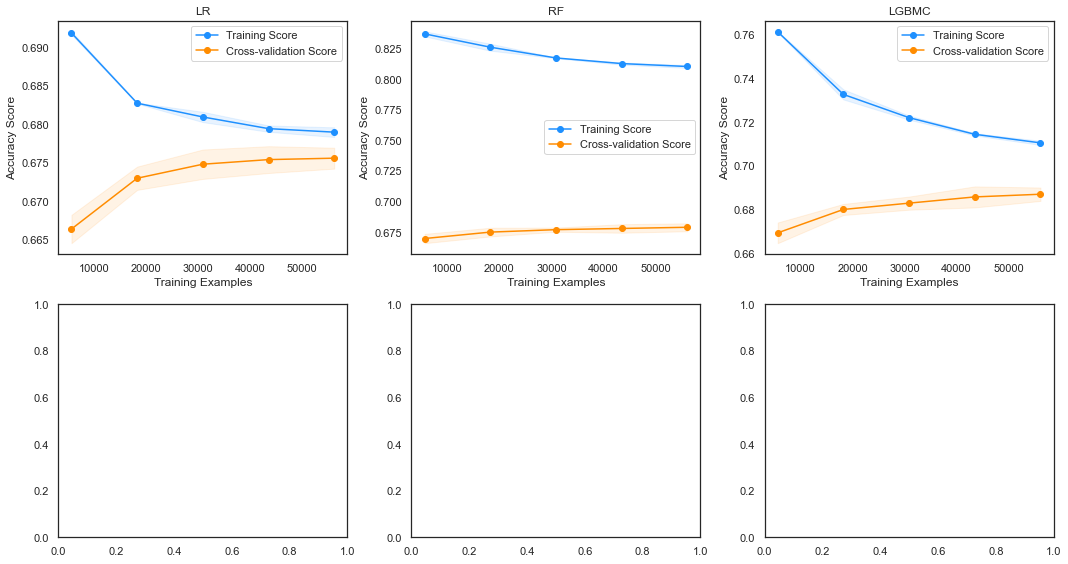

In [63]:
rownum=int(len(estimators)/3)+1
fig, ax = plt.subplots(rownum, 3, figsize = (15, 4*rownum))

for i in range(len(estimators)):
    plt.subplot(rownum, 3, i + 1)
    plot_learning_curve(estimators[i][1], estimators[i][0], X_train, y_train)
    
plt.tight_layout()


### Step 22: Feature Importance

In [64]:
def plot_feature_imp(classifier, classifier_name, color, ax):

    importances = pd.DataFrame({'Feature': X_train.columns,
                                'Importance': np.round(classifier.best_estimator_.feature_importances_, 3)})

    importances = importances.sort_values('Importance', ascending = True).set_index('Feature')
    importances[-20:].plot.barh(color = color, edgecolor = 'firebrick', legend = False, ax = ax)
    ax.set_title(classifier_name)
    ax.set_xlabel('Importance');

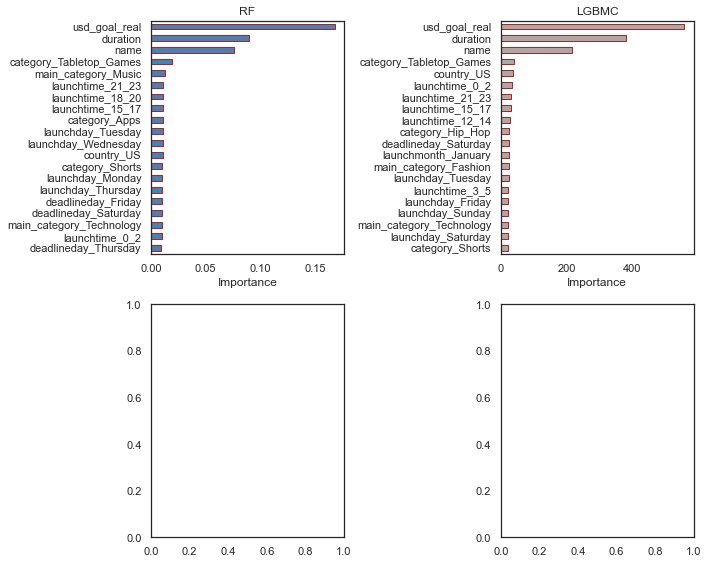

In [65]:
color_ = ['steelblue', 'darkgray', 'cadetblue', 'bisque']

fig = plt.subplots(2, 2, figsize = (10, 8))

for i in range(len(feature_list)): 
    name = feature_list[i][0]
    clf = feature_list[i][1]
    ax = plt.subplot(2, 2, i + 1)
    plot_feature_imp(clf, name, color_[i], ax)
    plt.ylabel('')
    
plt.tight_layout();

Critical features are: The goal, duration, and name length of the project.
Based on the data exploration and feature importance analysis, the following points can be considered as important for the success of the projects:
- Choosing a relatively low level goal for the project
- Choosing a short project campaing duration

### Step 23: Visualize Performance Comparison of Selected Models

In [66]:
comparison_matrix = {}
for key, value in comparison_dict.items():
    comparison_matrix[str(key)] = value[0:4]

comparison_df = pd.DataFrame(comparison_matrix, index = ['Accuracy', 'Precision', 'Recall', 'AUC']).T
comparison_df.style.highlight_max(color = 'indianred', axis = 0)

,Accuracy,Precision,Recall,AUC
LR,0.675365,0.627096,0.503215,0.729967
RF,0.679313,0.645558,0.473791,0.735967
LGBMC,0.687735,0.635537,0.549343,0.747629


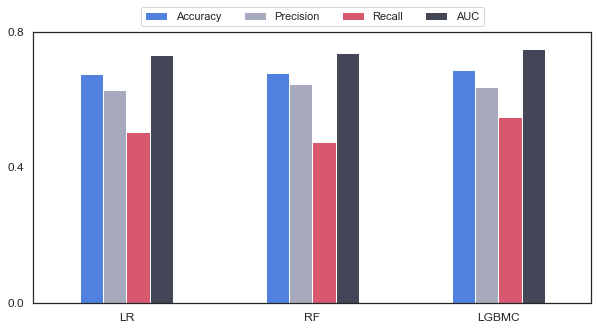

In [67]:
label_size=17

comparison_df.plot(kind = 'bar', figsize = (10, 5), fontsize = 12, 
                   color = ['#5081DE', '#A7AABD', '#D85870', '#424656'])

plt.legend(loc = 'upper center', ncol = len(comparison_df.columns), bbox_to_anchor = (0.5, 1.11))
plt.xticks(rotation = 0)
plt.yticks([0, 0.4, 0.8])

plt.show()

### Step 24: Evaluate the model using ROC Graph: 

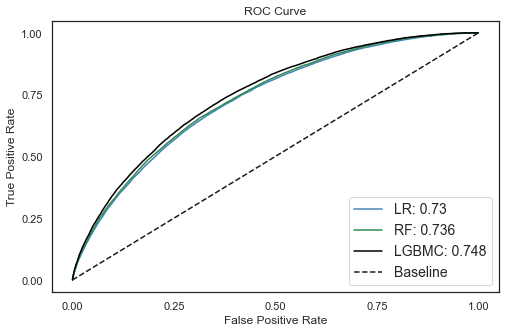

In [73]:
colors = ['steelblue', 'seagreen', 'black', 'darkorange', 'purple', 'firebrick', 'slategrey','red']

fig = plt.figure(figsize = (8, 5))

for index, key in enumerate(comparison_dict.keys()):
    auc, fpr, tpr = comparison_dict[key][3], comparison_dict[key][4], comparison_dict[key][5]
    plt.plot(fpr, tpr, color = colors[index], label = '{}: {}'.format(key, np.round(auc, 3)))

plt.plot([0, 1], [0, 1], 'k--', label = 'Baseline')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xticks([0, 0.25, 0.5, 0.75, 1])
plt.ylabel('True Positive Rate')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.legend(fontsize = 14);

# Section F: Test Data Predictions


### Step 25: Compare predictions against the test set:

In [69]:
def test_func(classifier, classifier_name):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, normalize = 'true')
    
    comparison_test_dict[classifier_name] = [accuracy_score(y_test, y_pred), 
                                             precision_score(y_test, y_pred),
                                             recall_score(y_test, y_pred),
                                             f1_score(y_test, y_pred,average='weighted')]
    
    plt.title(classifier_name)
    sns.heatmap(cm, annot = True, annot_kws = {'fontsize': 18}, cmap = 'Blues')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Failed', 'Successful'])
    plt.ylabel('True Label') 
    plt.yticks([0.2, 1.4], ['Failed', 'Successful']);

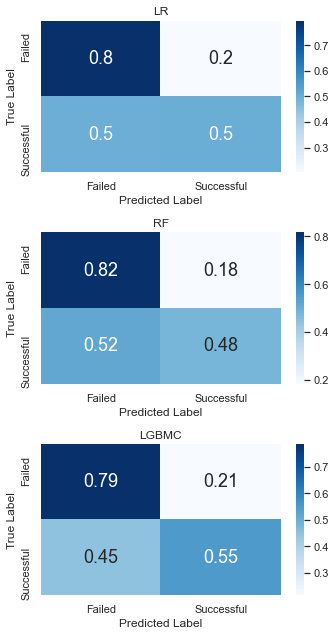

In [70]:
if selected_models['ensemble']:
    tuned_voting_soft.fit(X_train, y_train)
    
fig = plt.subplots(len(estimators), 1, figsize = (5, len(estimators)*3))
for i in range(len(estimators)):
    plt.subplot(len(estimators), 1, i + 1)
    test_func(estimators[i][1], estimators[i][0])
plt.tight_layout();

### Step 26: Model performance on test dataset

In [71]:
comparison_test_df = pd.DataFrame(comparison_test_dict, index = ['Accuracy', 'Precision', 'Recall', 'f1_Score']).T
comparison_test_df.style.highlight_max(color = 'indianred', axis = 0)

,Accuracy,Precision,Recall,f1_Score
LR,0.678087,0.621060,0.502279,0.670725
RF,0.681564,0.635217,0.480347,0.671441
LGBMC,0.691255,0.631381,0.549559,0.686959


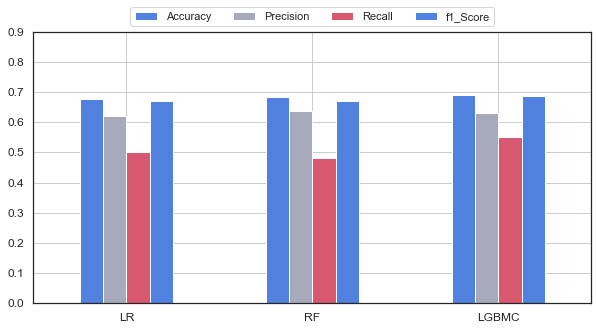

In [72]:
comparison_test_df.plot(kind = 'bar', figsize = (10, 5), fontsize = 12, grid='on',
                        color = ['#5081DE', '#A7AABD', '#D85870'])

plt.legend(loc = 'upper center', ncol = len(comparison_test_df.columns), bbox_to_anchor = (0.5, 1.11))
plt.xticks(rotation = 0)
plt.yticks(list(np.arange(0.0,1.0,0.1)))

plt.show()

### References:

1. [Predicting Customer Churn using Machine Learning](https://www.kaggle.com/korfanakis/predicting-customer-churn-using-machine-learning?scriptVersionId=49903138&cellId=111), by Orfanakis Konstantinos
2. [Predict Customer Churn in Python](https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7), by Sree